# Spark Investments Assignment

## Data importing and Data cleaning

In [1]:
#import the libraries
import pandas as pd,numpy as np

In [2]:
#read the dataset 
companies  = pd.read_csv('companies.csv',encoding = "ANSI")


In [3]:
rounds2   = pd.read_csv('rounds2.csv',encoding = "ANSI")

In [4]:
#Check the datatypes of all the columns of the dataframe
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
companies.shape

(66368, 10)

In [6]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [7]:
rounds2.shape

(114949, 6)

In [8]:
#check the rows of dataframes
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [10]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Phage-Technologies-S-A,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [11]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [12]:
rounds2['company_permalink'].unique()

array(['/organization/-fame', '/ORGANIZATION/-QOUNTER',
       '/organization/-qounter', ..., '/organization/ã\x81eron',
       '/ORGANIZATION/Ã”ASYS-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [13]:
len(rounds2['company_permalink'].str.lower().unique())

66368

In [14]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [15]:
companies['permalink']=companies['permalink'].str.lower()

To generate master data frame we have to merge both tables using inner join

In [16]:
#use inner  join to merge rounds2 and comapnies
master_frame=pd.merge(companies,rounds2, how='inner', left_on='permalink', right_on='company_permalink')

In [17]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [18]:
master_frame.shape

(114949, 16)

In [19]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

In [20]:
master_frame.dtypes

permalink                   object
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

DATA CLEANING

In [21]:
#check for null values
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [22]:
#finding the percentage of null values and rounding off to 2 decimal places
round((master_frame.isnull().sum()*100/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [23]:
master_frame['raised_amount_usd']

0         10000000.0
1                NaN
2           700000.0
3          3406878.0
4          2000000.0
             ...    
114944       41313.0
114945       32842.0
114946           NaN
114947       18192.0
114948       14851.0
Name: raised_amount_usd, Length: 114949, dtype: float64

In [24]:
#droping the rows with raised_amount_usd = NaN
master_frame=master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [25]:
round((master_frame.isnull().sum()*100/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

In [26]:
#droping the columns with null values which dont play any significant role in our analyzis and which has high percentage of null values
master_frame=master_frame.drop('funding_round_code',axis=1)
master_frame=master_frame.drop('homepage_url',axis=1)


In [27]:
#droping state_code region city and founded_at columns as they have null values and we require only the country_code
master_frame=master_frame.drop('state_code',axis=1)
master_frame=master_frame.drop('region',axis=1)
master_frame=master_frame.drop('city',axis=1)
master_frame=master_frame.drop('founded_at',axis=1)

In [28]:
#again checking the null values
round((master_frame.isnull().sum()*100/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [29]:
#checking category_list and country_code
master_frame['category_list'].describe()

count             93915
unique            23485
top       Biotechnology
freq               7773
Name: category_list, dtype: object

In [30]:
master_frame['country_code'].describe()

count     89108
unique      134
top         USA
freq      62049
Name: country_code, dtype: object

In [31]:
#if we impute country_code or category_list it may result in a bias , so it is better to drop the nan value
master_frame=master_frame[~pd.isnull(master_frame['category_list'])]
master_frame=master_frame[~pd.isnull(master_frame['country_code'])]

In [32]:
round((master_frame.isnull().sum()*100/len(master_frame.index)),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [33]:
#checking percentage of removed data
100-round(100*len(master_frame.index)/114949,2)

22.980000000000004

# Checkpoint 2

In [34]:
master_frame['raised_amount_usd'].describe()

count    8.852900e+04
mean     1.047385e+07
std      1.118118e+08
min      0.000000e+00
25%      3.705180e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [35]:
#importing libraries for ploting data
import seaborn as sns
import matplotlib.pyplot as plt

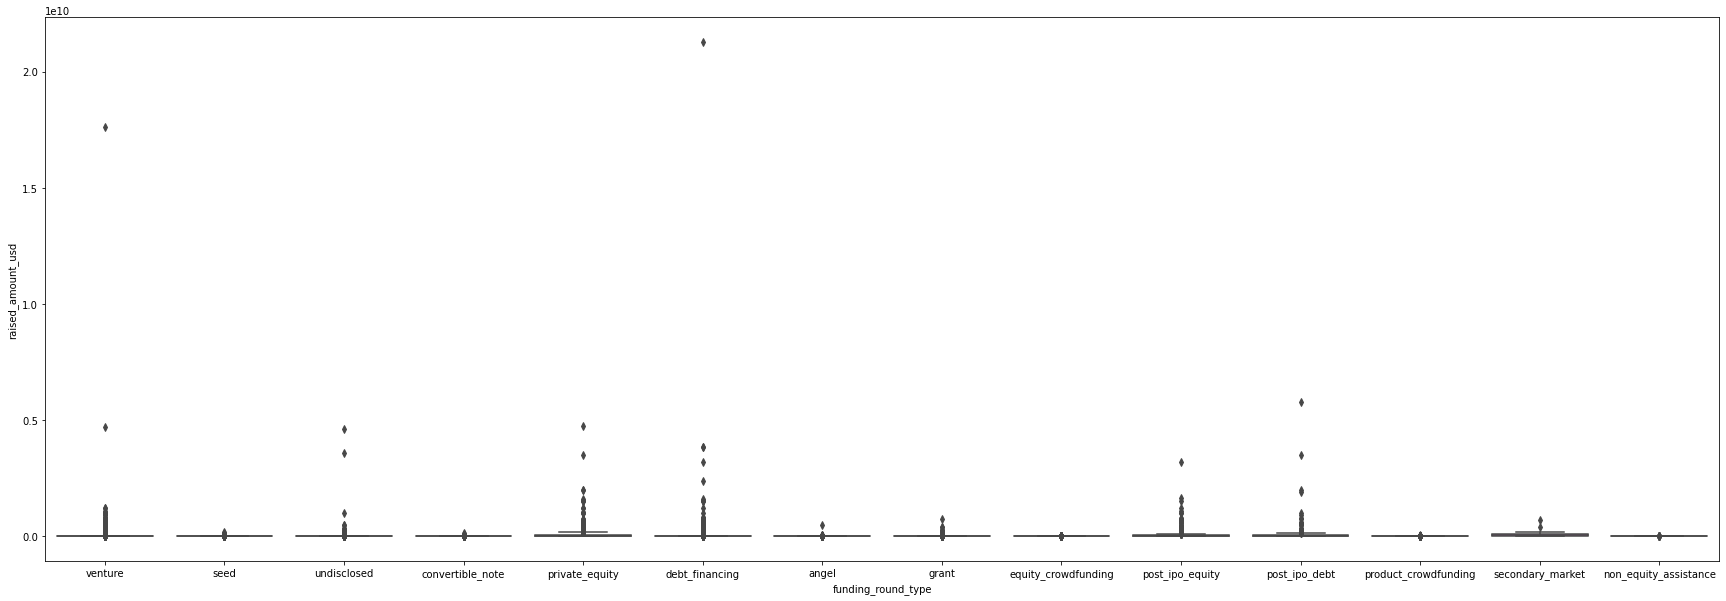

In [36]:
#using boxplot to analyze range of raised amount in various funding categories
plt.figure(figsize=(30,10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd',data=master_frame)
plt.show()

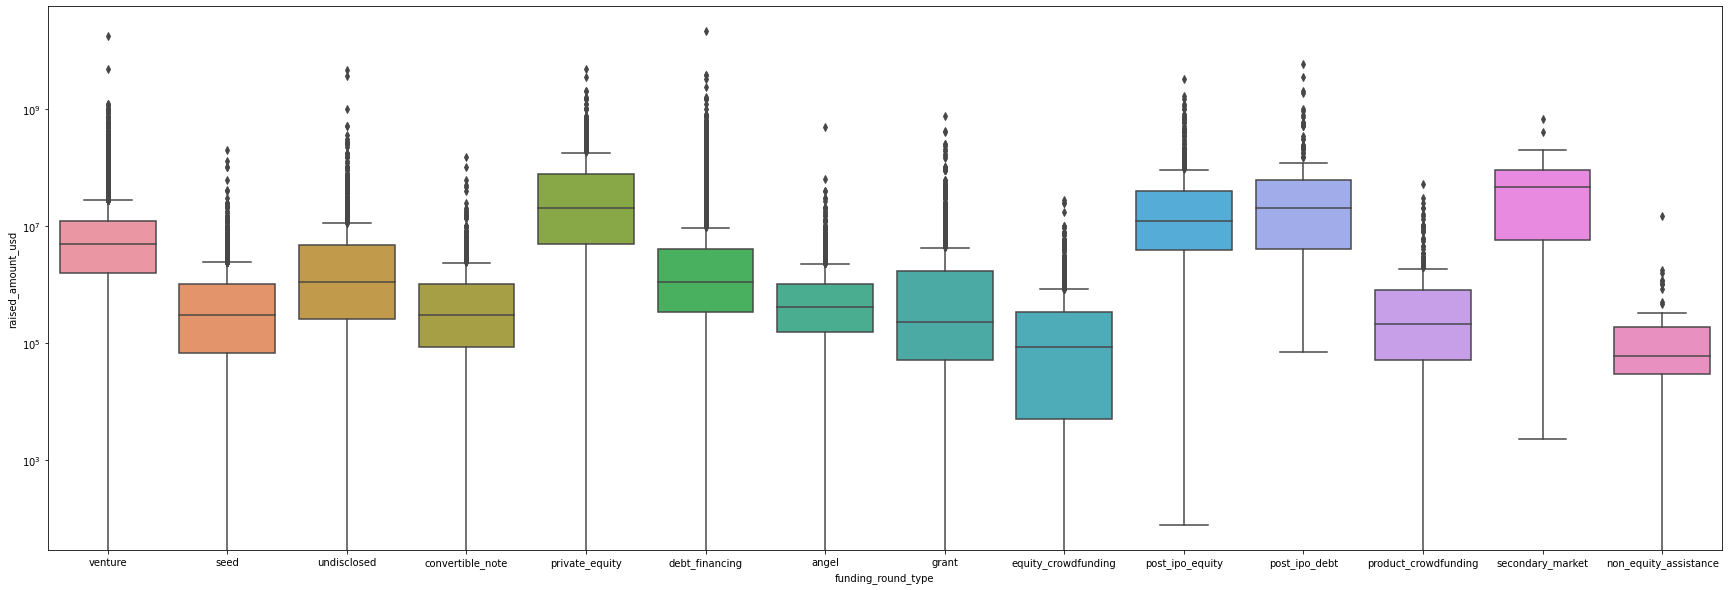

In [37]:
plt.figure(figsize=(30,10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd',data=master_frame)
plt.yscale('log')
plt.show()

barplot with mean and median of raised amount across different type of funding categories

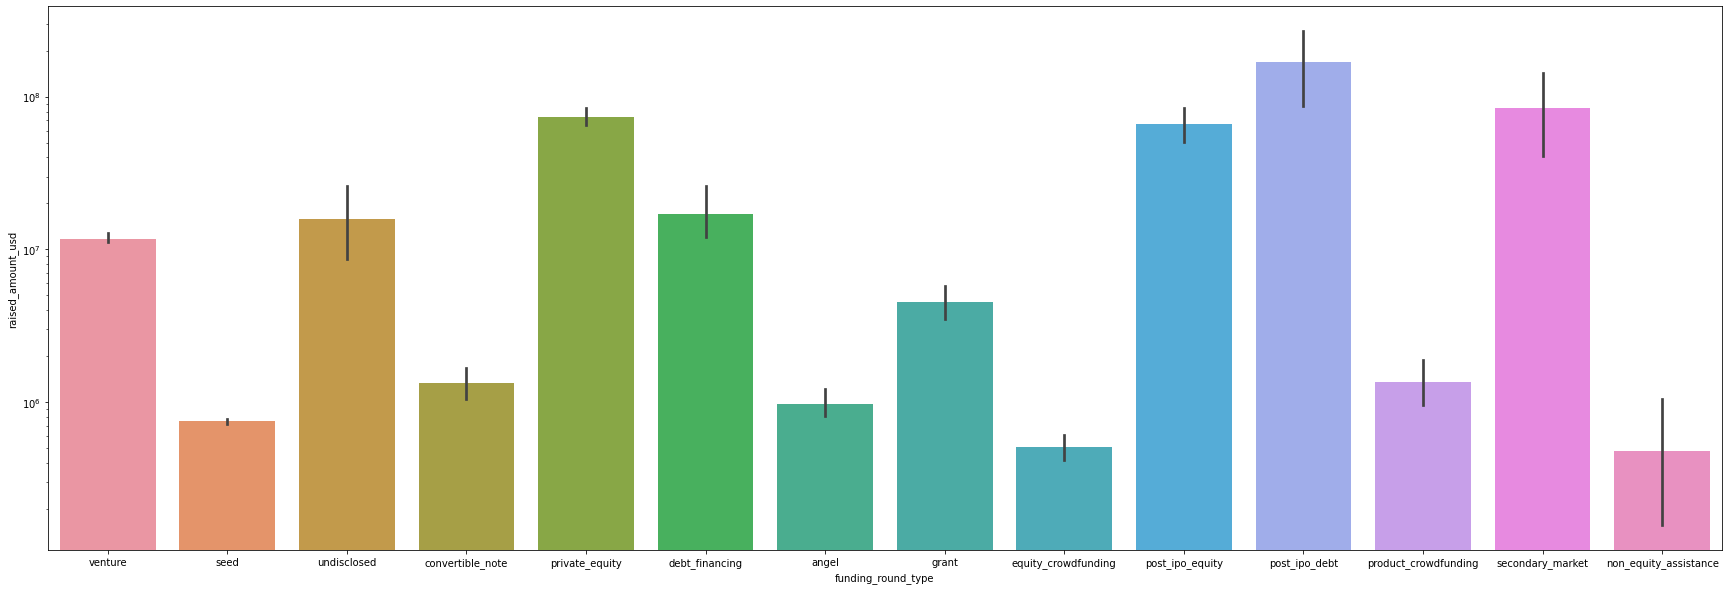

In [38]:
#barplot
#mean
plt.figure(figsize=(30,10))
sns.barplot(x='funding_round_type', y='raised_amount_usd',data=master_frame , estimator=np.mean)
plt.yscale('log')
plt.show()

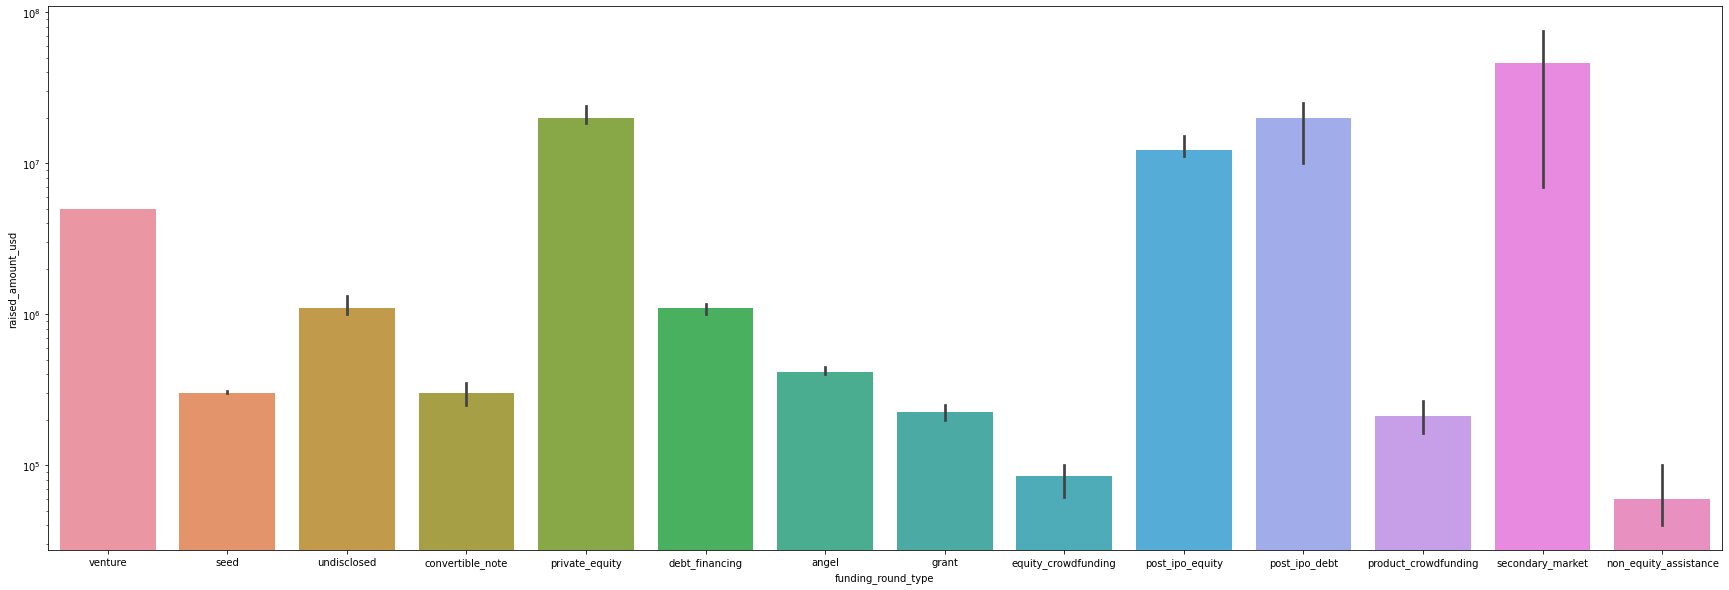

In [39]:
#barplot
#median
plt.figure(figsize=(30,10))
sns.barplot(x='funding_round_type', y='raised_amount_usd',data=master_frame , estimator=np.median)
plt.yscale('log')
plt.show()

Deriving a new data frame from master frame that contain only seed,venture,angel and private equity

In [40]:
master_frame1=master_frame[master_frame['funding_round_type'].isin(['seed','venture','angel','private_equity'])]

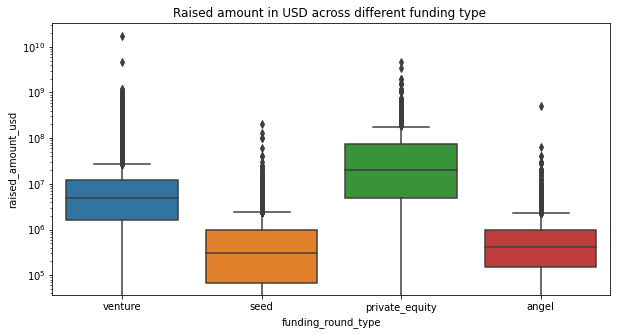

In [41]:
#using boxplot to analyze range of raised amount in various funding categories

plt.figure(figsize=(10,5))
sns.boxplot(x='funding_round_type', y='raised_amount_usd',data=master_frame1)
plt.title('Raised amount in USD across different funding type ')
plt.yscale('log')
plt.show()

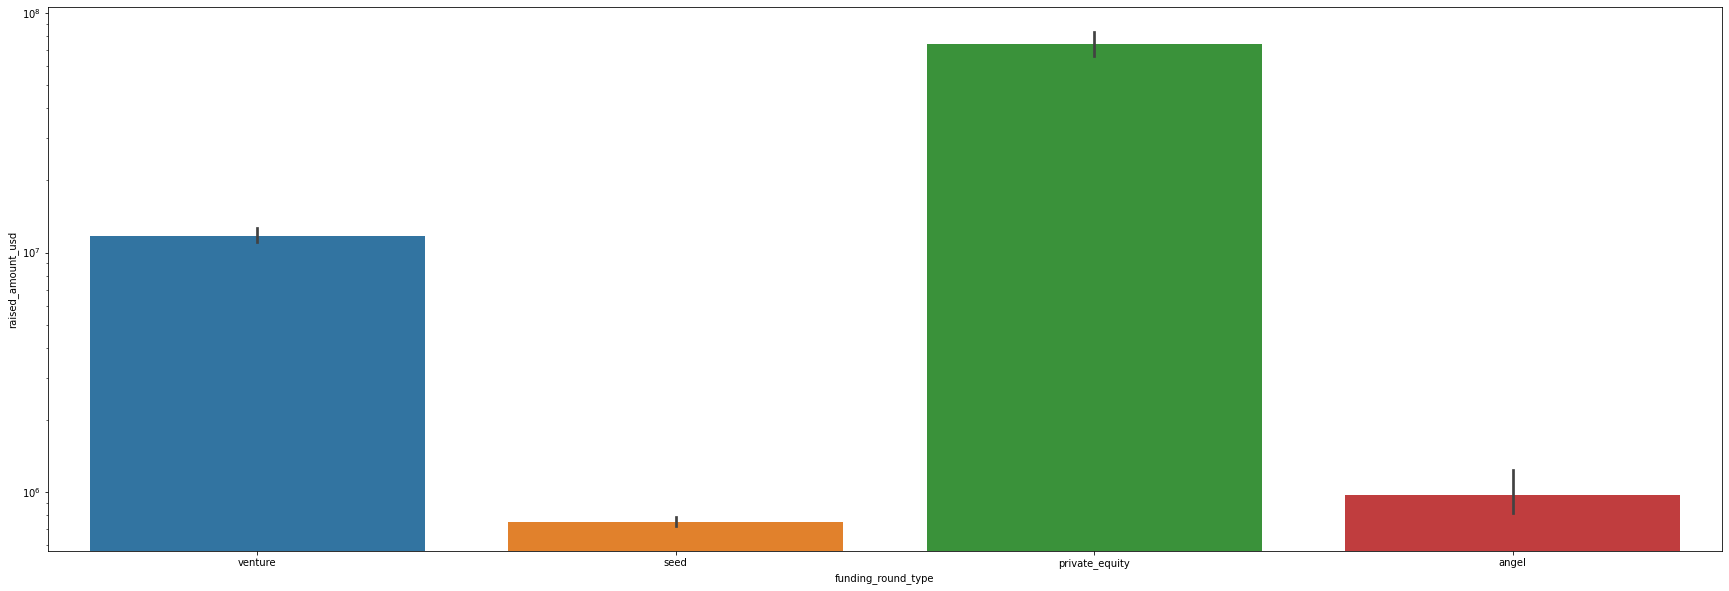

In [42]:
#barplot
#mean
plt.figure(figsize=(30,10))
sns.barplot(x='funding_round_type', y='raised_amount_usd',data=master_frame1 , estimator=np.mean)
plt.yscale('log')
plt.show()

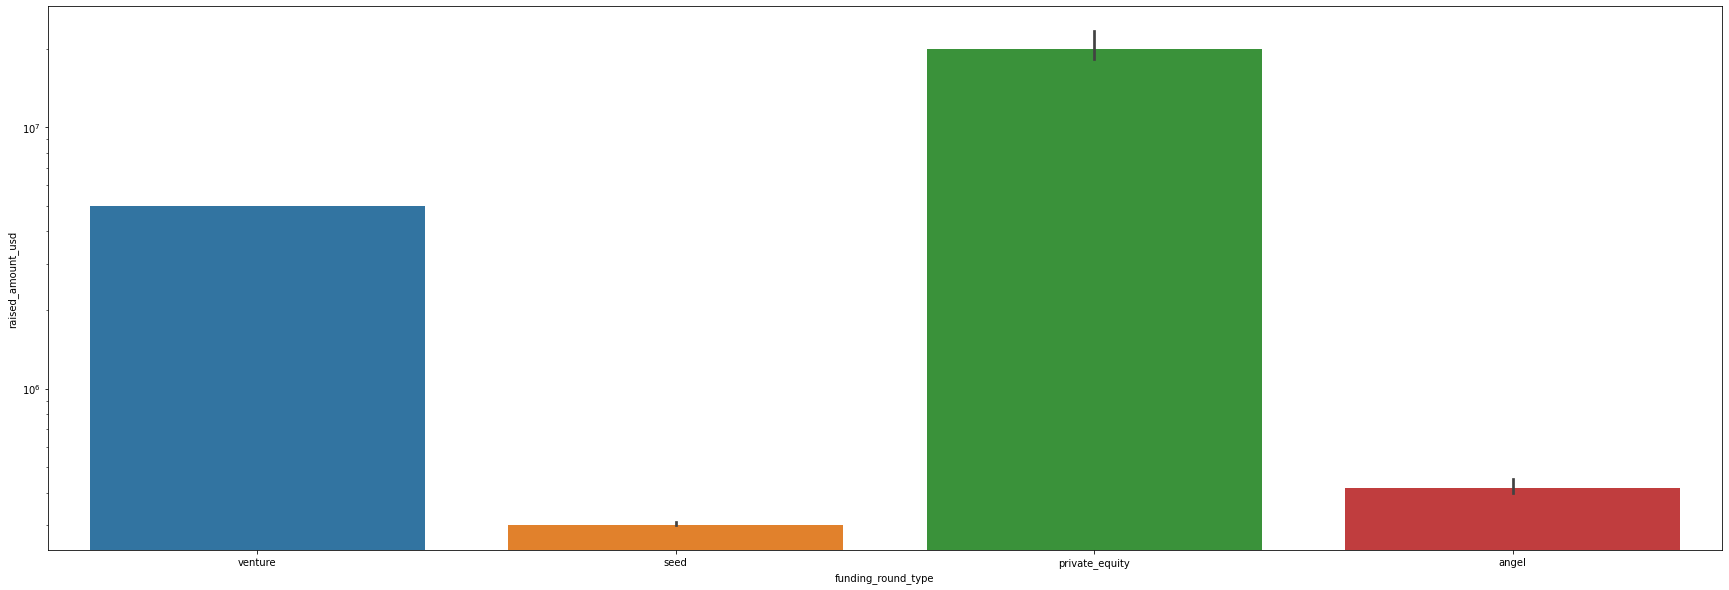

In [43]:
#barplot
#mean
plt.figure(figsize=(30,10))
sns.barplot(x='funding_round_type', y='raised_amount_usd',data=master_frame1 , estimator=np.median)
plt.yscale('log')
plt.show()

In [44]:
master_frame1.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel             9.715739e+05
private_equity    7.393849e+07
seed              7.477937e+05
venture           1.172422e+07
Name: raised_amount_usd, dtype: float64

In [45]:
master_frame1.groupby('funding_round_type')['raised_amount_usd'].median()

funding_round_type
angel               414906.0
private_equity    20000000.0
seed                300000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

Since mean may get influenced by outliers we can choose median as Representative funding amount

 Analysing the data to findout the investment type suitable for investing between 5 and 15 million USD

In [46]:
master_frame1['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

So venture is the  investment type having max count.

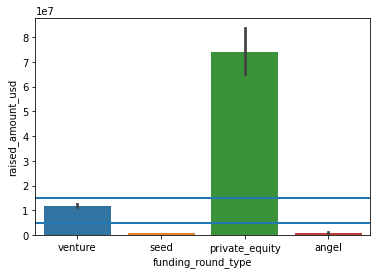

In [47]:
sns.barplot(x='funding_round_type', y='raised_amount_usd',data=master_frame1 , estimator=np.mean)


plt.axhline(y=5000000, linewidth=2)
plt.axhline(y=15000000, linewidth=2)
plt.show()

Since most of the company has venture investment type and it comes under 5 and 15 million USD we can choose venture type of investment as the best investment type

In [48]:
master_frame1=master_frame1[master_frame1['funding_round_type']=='venture']

## Check point 3 - Country Analysis

In [49]:
master_frame1['country_code'].value_counts()

USA    35943
GBR     2041
CHN     1548
CAN     1246
FRA      912
       ...  
GTM        1
MNE        1
MCO        1
MMR        1
GGY        1
Name: country_code, Length: 97, dtype: int64

finding the top9 countries based on the total investment type each country has recived

In [50]:
#using group by
master_frame1.groupby('country_code')['raised_amount_usd'].sum()

country_code
ARE    3.426175e+08
ARG    3.143388e+08
ARM    2.651750e+07
AUS    1.319029e+09
AUT    5.833607e+08
           ...     
UKR    1.779246e+07
URY    1.983000e+07
USA    4.200680e+11
VNM    4.732051e+07
ZAF    2.337131e+08
Name: raised_amount_usd, Length: 97, dtype: float64

In [51]:
#sorting above values
master_frame1.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [52]:
#top 9 countries data frame
top9=master_frame1[master_frame1['country_code'].isin(['USA','CHN','GBR','IND','CAN','DEU','ISR','FRA','NLD'])]

In [53]:
top9['country_code'].value_counts()

USA    35943
GBR     2041
CHN     1548
CAN     1246
FRA      912
IND      819
ISR      786
DEU      554
NLD      184
Name: country_code, dtype: int64

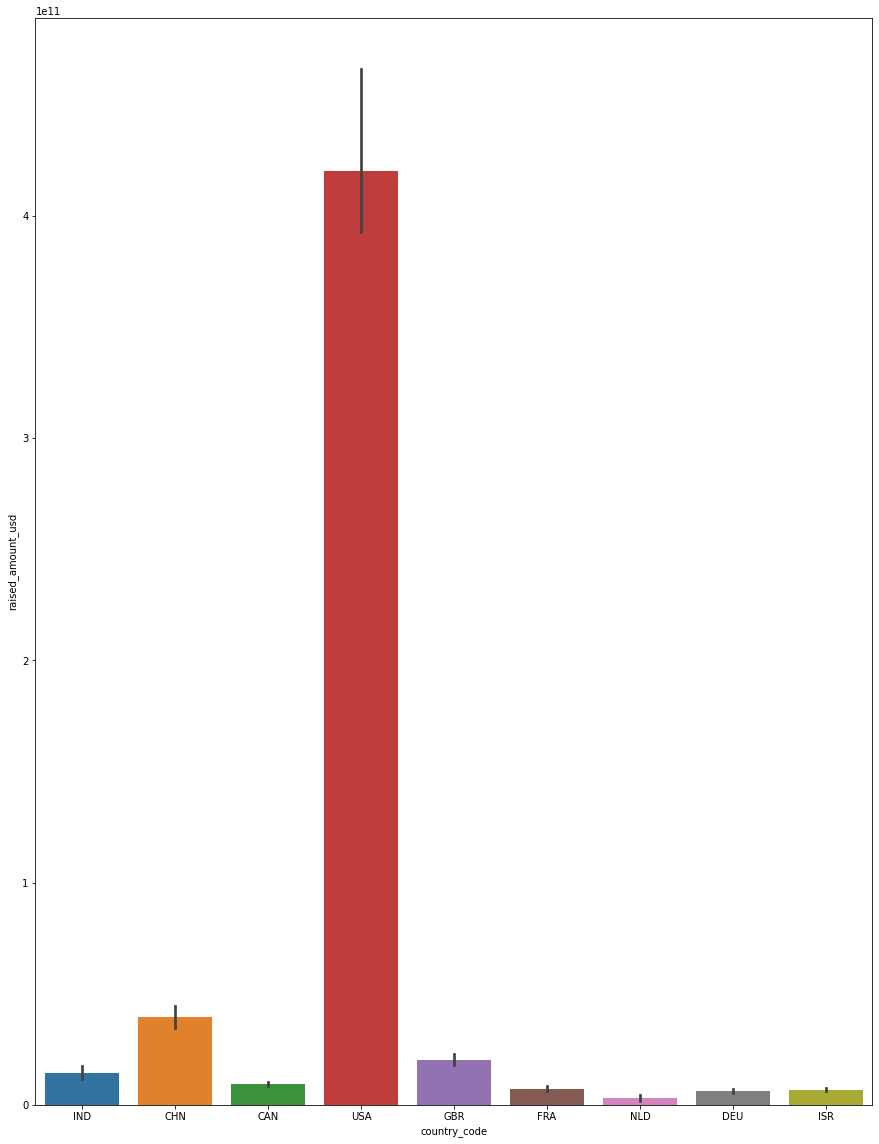

In [54]:
#ploting the sum of amount raised across top9 countries
plt.figure(figsize=(15,20))
sns.barplot(x='country_code', y='raised_amount_usd',data=top9 , estimator=sum)
plt.show()

Among the top9 USA,IND,CAN,GBR,ISR are the English speaking countries and from the above graph it can be infered that they follow the below order
USA
GBR
IND
CAN
ISR

## Check-point 4

In [55]:
#filtering data for only top3 countries
top3=master_frame1[master_frame1['country_code'].isin(['USA','GBR','IND'])]

In [56]:
#loading mapping.csv file
mapping  = pd.read_csv('mapping.csv',encoding = "ANSI")

In [57]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [58]:
mapping.shape

(688, 10)

In [59]:
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [60]:
#resturcting the mapping dataframe using melt function
mapping=pd.melt(mapping,id_vars=['category_list'],var_name='main_sector')

In [61]:
mapping.head(10)

,category_list,main_sector,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [62]:
#removing the rows with value zero
mapping=mapping[mapping.value!=0]

In [63]:
mapping.head(10)

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [64]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 8 to 6167
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    688 non-null    object
 2   value          688 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


In [65]:
mapping.shape

(688, 3)

In [66]:
mapping['primary_sector']=mapping['category_list']

In [67]:
mapping=mapping.drop('category_list',axis=1)

In [68]:
mapping.head()

,main_sector,value,primary_sector
8,Automotive & Sports,1,Adventure Travel
14,Automotive & Sports,1,Aerospace
45,Automotive & Sports,1,Auto
46,Automotive & Sports,1,Automated Kiosk
47,Automotive & Sports,1,Automotive


In [69]:
top3.head(10)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0
28,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0
34,/organization/1000memories,1000memories,Curated Web,acquired,USA,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0
38,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0
39,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0
41,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0


In [70]:
#extracting the primary_sector from the category list for top3 dataframe
top3['category_list']=top3['category_list'].apply(lambda x:(x.split('|')[0] if(len(x.split('|'))>1) else x))

<ipython-input-70-34e0334e2d3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['category_list']=top3['category_list'].apply(lambda x:(x.split('|')[0] if(len(x.split('|'))>1) else x))


In [71]:
top3.head(20)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0
28,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0
34,/organization/1000memories,1000memories,Curated Web,acquired,USA,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0
38,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0
39,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0
41,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0


In [72]:
top3['category_list'].unique()

array(['Media', 'Analytics', 'Apps', 'Education', 'Curated Web',
       'Health Care', 'Software', 'Biotechnology', 'Enterprise Software',
       'Service Providers', 'Manufacturing', 'Advertising', 'Internet',
       'Clean Technology', 'Health and Wellness', 'E-Commerce', 'News',
       'Art', 'Big Data', 'Finance', 'EdTech', 'Computers',
       'Cloud Computing', 'Hardware + Software', 'Internet of Things',
       'Cloud Infrastructure', 'Messaging', 'Information Technology',
       'Consumer Electronics', 'Data Centers', 'Android',
       'Customer Service', '3D Technology', '3D', 'Games', 'Drones',
       '3D Printing', 'Automated Kiosk', 'Music', 'Web Hosting',
       'Cloud Data Services', 'Consulting', 'Physical Security',
       'Security', 'Databases', 'Flash Storage', 'Machine Learning',
       'Commercial Real Estate', 'Anything Capital Intensive',
       'Automotive', 'Ad Targeting', 'Office Space', 'Online Shopping',
       'Mobile', 'Accounting', 'B2B', 'Nanotechnology',

In [73]:
top3_merged=top3.merge(mapping,how="left",left_on="category_list",right_on="primary_sector",indicator=True)

In [74]:
top3_merged.shape

(38803, 14)

In [75]:
top3.shape

(38803, 10)

In [76]:
top3_merged.head(20)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value,primary_sector,_merge
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment,1.0,Media,both
1,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,NaN,NaN,NaN,left_only
2,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,NaN,NaN,NaN,left_only
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,NaN,NaN,NaN,left_only
4,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,"News, Search and Messaging",1.0,Apps,both
5,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Others,1.0,Education,both
6,/organization/1000memories,1000memories,Curated Web,acquired,USA,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,"News, Search and Messaging",1.0,Curated Web,both
7,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,"News, Search and Messaging",1.0,Curated Web,both
8,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0,"News, Search and Messaging",1.0,Curated Web,both
9,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0,"News, Search and Messaging",1.0,Curated Web,both


In [77]:
top3_merged.head(20)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value,primary_sector,_merge
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment,1.0,Media,both
1,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,NaN,NaN,NaN,left_only
2,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,NaN,NaN,NaN,left_only
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,NaN,NaN,NaN,left_only
4,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,"News, Search and Messaging",1.0,Apps,both
5,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Others,1.0,Education,both
6,/organization/1000memories,1000memories,Curated Web,acquired,USA,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,"News, Search and Messaging",1.0,Curated Web,both
7,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,"News, Search and Messaging",1.0,Curated Web,both
8,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0,"News, Search and Messaging",1.0,Curated Web,both
9,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0,"News, Search and Messaging",1.0,Curated Web,both


Analysing the merged data frame we can find some primary sectors like analytics are missing in mapping file.So we have to analyse the primary_sector column in mapping for any discepinces

In [78]:
mapping['primary_sector'].unique()

array(['Adventure Travel', 'Aerospace', 'Auto', 'Automated Kiosk',
       'Automotive', 'Bicycles', 'Boating Industry', 'CAD', 'Cars',
       'Design', 'Designers', 'Drones', 'Electric Vehicles', 'Fuels',
       'Heavy Industry', 'Industrial Automation', 'Limousines', 'Soccer',
       'Sporting Goods', 'Sports', 'Transportation',
       'Unmanned Air Systems', nan, 'Air Pollution Control',
       'Aquaculture', 'Bio-Pharm', 'Biofuels', 'Bioinformatics',
       'Biomass Power Generation', 'Biometrics', 'Biotechnology',
       'Bitcoin', 'Carbon', 'Chemicals', 'Clean Energy',
       'Clean Technology', 'Clean Technology IT', 'Commercial Solar',
       'Commodities', 'Concentrated Solar Power', 'Disruptive Models',
       'Early-Stage Technology', 'Energy', 'Energy Efficiency',
       'Energy IT', 'Energy Ma0gement', 'Energy Storage',
       'Environmental Innovation', 'Fertility', 'Fuel Cells',
       'Funeral Industry', 'Gas', 'Green', 'Green Consumer Goods',
       'Home & Garden', 'Ho

In [79]:
mapping=mapping[~mapping['primary_sector'].isnull()]

In [80]:
mapping.dtypes

main_sector       object
value              int64
primary_sector    object
dtype: object

In [81]:
mapping['primary_sector']=mapping['primary_sector'].astype("string")

In [82]:
mapping.dtypes

main_sector       object
value              int64
primary_sector    string
dtype: object

In [83]:
mapping['primary_sector']=mapping['primary_sector'].apply(lambda x:x.replace('0','na'))

In [84]:
mapping['primary_sector']=mapping['primary_sector'].astype("object")

In [85]:
mapping['primary_sector'].unique()

array(['Adventure Travel', 'Aerospace', 'Auto', 'Automated Kiosk',
       'Automotive', 'Bicycles', 'Boating Industry', 'CAD', 'Cars',
       'Design', 'Designers', 'Drones', 'Electric Vehicles', 'Fuels',
       'Heavy Industry', 'Industrial Automation', 'Limousines', 'Soccer',
       'Sporting Goods', 'Sports', 'Transportation',
       'Unmanned Air Systems', 'Air Pollution Control', 'Aquaculture',
       'Bio-Pharm', 'Biofuels', 'Bioinformatics',
       'Biomass Power Generation', 'Biometrics', 'Biotechnology',
       'Bitcoin', 'Carbon', 'Chemicals', 'Clean Energy',
       'Clean Technology', 'Clean Technology IT', 'Commercial Solar',
       'Commodities', 'Concentrated Solar Power', 'Disruptive Models',
       'Early-Stage Technology', 'Energy', 'Energy Efficiency',
       'Energy IT', 'Energy Management', 'Energy Storage',
       'Environmental Innovation', 'Fertility', 'Fuel Cells',
       'Funeral Industry', 'Gas', 'Green', 'Green Consumer Goods',
       'Home & Garden', 'Home A

In [86]:
#merging the mapping data frame with the top3 dataframe
top3_merged=top3.merge(mapping,how="left",left_on="category_list",right_on="primary_sector",indicator=True)

In [87]:
top3_merged.head(20)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value,primary_sector,_merge
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment,1.0,Media,both
1,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,"Social, Finance, Analytics, Advertising",1.0,Analytics,both
2,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,"Social, Finance, Analytics, Advertising",1.0,Analytics,both
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,"Social, Finance, Analytics, Advertising",1.0,Analytics,both
4,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,"News, Search and Messaging",1.0,Apps,both
5,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Others,1.0,Education,both
6,/organization/1000memories,1000memories,Curated Web,acquired,USA,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,"News, Search and Messaging",1.0,Curated Web,both
7,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,"News, Search and Messaging",1.0,Curated Web,both
8,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0,"News, Search and Messaging",1.0,Curated Web,both
9,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0,"News, Search and Messaging",1.0,Curated Web,both


In [88]:
top3_merged=top3_merged[top3_merged._merge=='both']

In [89]:
top3_merged['main_sector'].unique()

array(['Entertainment', 'Social, Finance, Analytics, Advertising',
       'News, Search and Messaging', 'Others', 'Health',
       'Cleantech / Semiconductors', 'Manufacturing',
       'Automotive & Sports'], dtype=object)

## Checkpoint 5

### separating the top3_merged to D1,D2,D3 for each of the three countries USA,GBR,IND respectively for venture funding_type(between 5-15 million USD range)

In [90]:
top3_merged=top3_merged[top3_merged['raised_amount_usd']>=5000000]

In [91]:
top3_merged=top3_merged[top3_merged['raised_amount_usd']<=15000000]

In [92]:
top3_merged.shape

(12959, 14)

Splitting the data frame to D1, D2, D3 based on country

In [93]:
D1=top3_merged[top3_merged['country_code']=='USA']

In [94]:
D2=top3_merged[top3_merged['country_code']=='GBR']

In [95]:
D3=top3_merged[top3_merged['country_code']=='IND']

Getting the total count of investments

In [96]:
D1['funding_round_type'].value_counts()

venture    12012
Name: funding_round_type, dtype: int64

In [97]:
D2['funding_round_type'].value_counts()

venture    619
Name: funding_round_type, dtype: int64

In [98]:
D3['funding_round_type'].value_counts()

venture    328
Name: funding_round_type, dtype: int64

Getting total amount invested in each country

In [99]:
D1['raised_amount_usd'].sum()

107318294664.0

In [100]:
D2['raised_amount_usd'].sum()

5365228300.0

In [101]:
D3['raised_amount_usd'].sum()

2949543602.0

Getting the top sector in each of the three countries

In [102]:
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values()

main_sector
Automotive & Sports                         167
Entertainment                               591
Manufacturing                               799
Health                                      909
News, Search and Messaging                 1582
Cleantech / Semiconductors                 2300
Social, Finance, Analytics, Advertising    2714
Others                                     2950
Name: raised_amount_usd, dtype: int64

In [103]:
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values()

main_sector
Automotive & Sports                         16
Health                                      24
Manufacturing                               42
Entertainment                               56
News, Search and Messaging                  73
Cleantech / Semiconductors                 128
Social, Finance, Analytics, Advertising    133
Others                                     147
Name: raised_amount_usd, dtype: int64

In [104]:
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values()

main_sector
Automotive & Sports                         13
Health                                      19
Cleantech / Semiconductors                  20
Manufacturing                               21
Entertainment                               33
News, Search and Messaging                  52
Social, Finance, Analytics, Advertising     60
Others                                     110
Name: raised_amount_usd, dtype: int64

Getting the top companies in the top sector count-wise

In [105]:
D1[D1['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
                                        ...    
/organization/startforce              5000000.0
/organization/lumeta                  5000000.0
/organization/storenvy                5000000.0
/organization/stormwind               5000000.0
/organization/reachforce              5000000.0
Name: raised_amount_usd, Length: 2049, dtype: float64

In [106]:
D2[D2['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
                                            ...    
/organization/vector-watch                5000000.0
/organization/udex                        5000000.0
/organization/bullguard                   5000000.0
/organization/parcelgenie                 5000000.0
/organization/thefilter                   5000000.0
Name: raised_amount_usd, Length: 120, dtype: float64

In [107]:
D3[D3['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/firstcry-com           39000000.0
/organization/myntra                 38000000.0
/organization/commonfloor            32900000.0
/organization/pepperfry-com          28000000.0
/organization/itzcash-card-ltd       25000000.0
                                        ...    
/organization/liases-foras            5000000.0
/organization/securens                5000000.0
/organization/appsdaily-solutions     5000000.0
/organization/tastykhana              5000000.0
/organization/reznext                 5000000.0
Name: raised_amount_usd, Length: 88, dtype: float64

Getting the top companies in the second best sector count-wise

In [108]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/shotspotter    67933006.0
/organization/demandbase     63000000.0
/organization/intacct        61800000.0
/organization/netbase        60600000.0
/organization/lotame         59700000.0
                                ...    
/organization/booyah          5000000.0
/organization/peerspace       5000000.0
/organization/veri-tax        5000000.0
/organization/bo-lt           5000000.0
/organization/karmic-labs     5000000.0
Name: raised_amount_usd, Length: 1847, dtype: float64

In [109]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
/organization/imagini                  28550000.0
/organization/marketinvoice            25553007.0
                                          ...    
/organization/moo                       5000000.0
/organization/rangespan                 5000000.0
/organization/the-fizzback-group        5000000.0
/organization/duedil                    5000000.0
/organization/tamoco                    5000000.0
Name: raised_amount_usd, Length: 104, dtype: float64

In [110]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/manthan-systems                                 50700000.0
/organization/komli-media                                     28000000.0
/organization/shopclues-com                                   25000000.0
/organization/intarvo                                         21900000.0
/organization/grameen-financial-services                      21556050.0
/organization/bankbazaar                                      19000000.0
/organization/microland                                       18300000.0
/organization/eka-software-solutions                          16000000.0
/organization/qyuki                                           15400000.0
/organization/travelguru                                      15000000.0
/organization/apnaloan                                        15000000.0
/organization/financial-information-network-operations-pvt    15000000.0
/organization/shiram-credit                                   15000000.0
/organization/capital-float              

## Checkpoint 6

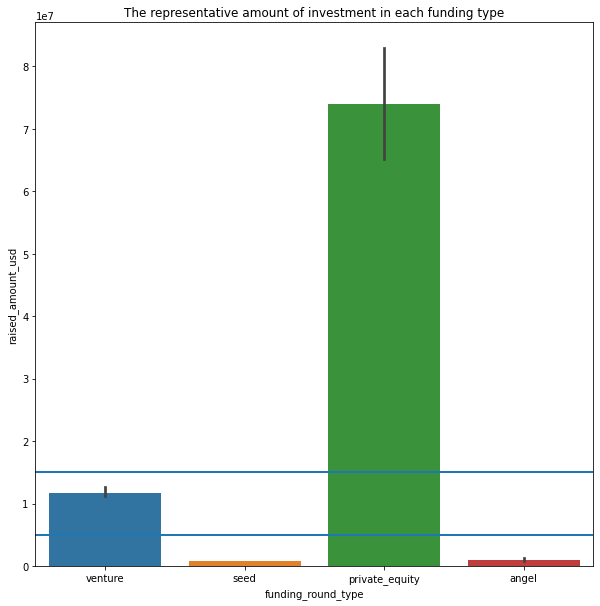

In [111]:
#plot1
master_frame2=master_frame[master_frame['funding_round_type'].isin(['seed','venture','angel','private_equity'])]
plt.figure(figsize=(10,10))
sns.barplot(x='funding_round_type', y='raised_amount_usd',data=master_frame2 , estimator=np.mean)
plt.title('The representative amount of investment in each funding type')
plt.axhline(y=5000000, linewidth=2)
plt.axhline(y=15000000, linewidth=2)
plt.show()

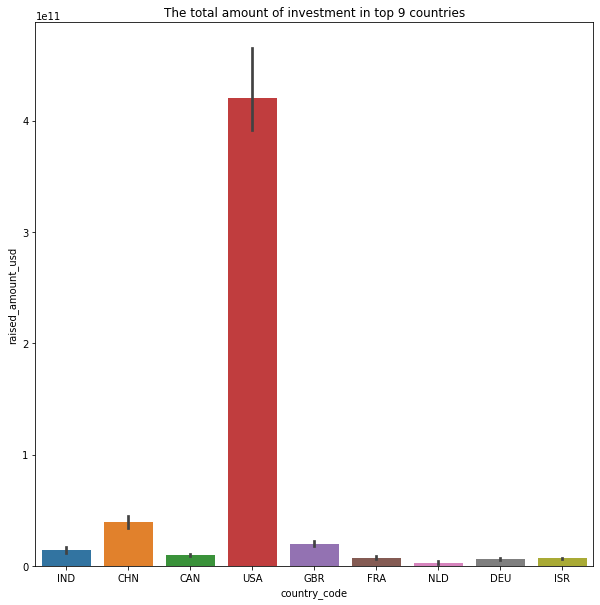

In [112]:
#plot2
plt.figure(figsize=(10,10))
sns.barplot(x='country_code', y='raised_amount_usd',data=top9 , estimator=sum)
plt.title('The total amount of investment in top 9 countries')
plt.show()

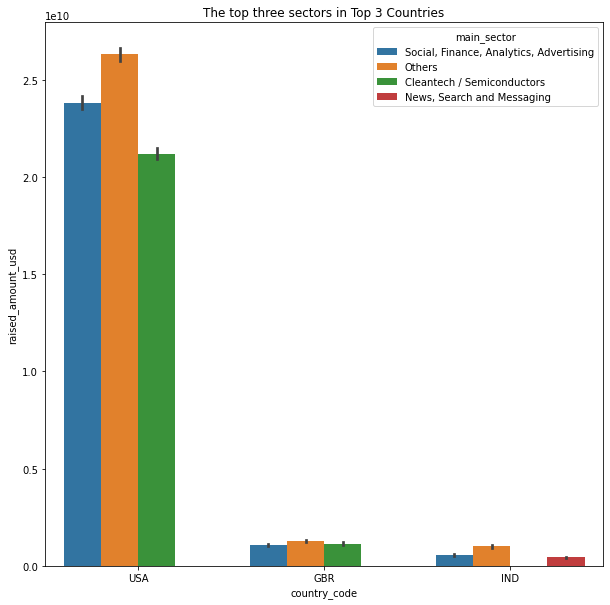

In [113]:
#plot3
D1=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D2=D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D3=D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]
dfs=[D1,D2,D3]
final_DF=pd.concat(dfs)
plt.figure(figsize=(10,10))
sns.barplot(x='country_code', y='raised_amount_usd',hue='main_sector',data=final_DF , estimator=sum)
plt.title('The top three sectors in Top 3 Countries')
plt.show()